In [1]:
import numpy as np
import pandas as pd
from plotly import express as px
import pandas as pd
from konlpy.tag import Mecab
from functools import *
from collections import Counter
import numpy as np
from tqdm.auto import tqdm
import pickle
import joblib



In [2]:
df = pd.read_parquet('../df_qesg28_final_time.pq')
tfidfv= joblib.load('./tfidfv_cat_v07.joblib') 

C:\Users\d331\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.24.0 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\d331\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.24.0 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
df_sel1 = df.loc[df.y == '환경관리체계']
df_sel2 = df.loc[df.y == '대기오염']

In [4]:
sel1 = [16879,
148700,
181331,
181685,
206322,
287719,
184980,
185160,
186914,
166507,
237781,
265324,
204447,
330682,
324570,
345293,
336724,
284840,
281653,
344473,
224077,
323704,
297990,
285234,
334198,
]

In [5]:
df_sel1.index = df_sel1.id
df_sel1  = df_sel1.loc[sel1]

In [6]:
# sel2 
sel2 = [155072,  155072,  161142,  171915,  173564,  177657,  177657,  204903,  185159, 201414,  210417,  215721,  219112,  219395,  313644,  235718]

In [7]:
df_sel2.index = df_sel2.id
df_sel2  = df_sel2.loc[sel2]

In [8]:
df_sel2['from'] = '대기오염'
df_sel1['from'] = '환경관리체계'

In [9]:
df_all = pd.concat([df_sel2,df_sel1])
df_all = df_all.reset_index(drop=True)

In [10]:
feature = tfidfv.transform(df_all.contents_clean).toarray()

In [19]:
df_all.to_excel('./25개씩고른뉴스.xlsx')

In [11]:
import plotly as py
import plotly.graph_objs as go

import umap
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
from matplotlib import pyplot as plt
import matplotlib as mlt
warnings.filterwarnings("ignore") 

In [12]:
plt.rc('font', family='Malgun Gothic') # 폰트 지정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

In [13]:
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [14]:

# metric
dist_list = ['manhattan',         
             'correlation',
             'cosine',
             'dice']
n_neighbor_list = np.arange(2 , 6 , 1)
min_dist_list = np.arange(0.1 , 1.0 , 0.3)

In [15]:

def plot_umap_unsupervised(xs,ys , issupervised ,n_neighbors , min_dist , dist, figsize = (8,6), save_dir = None):
    umap_model = umap.UMAP(n_neighbors=n_neighbors,
                          min_dist=min_dist,
                          n_components = 2,
                          metric=dist )
    if issupervised:
        embedding = umap_model.fit_transform(xs,ys)
    else:
        embedding = umap_model.fit_transform(xs)
    print('-'*100)
    print(dist , n_neighbors , min_dist)

    fig , ax = plt.subplots(1,1,figsize = figsize)

    #sns.scatterplot(embedding[:,0] , embedding[:,1] , hue = ys , ax = ax)
     # color 의 수는 class 수와 같게 맞춘다. 
    color = sns.color_palette("colorblind", 2)
    sns.scatterplot(embedding[:, 0], embedding[:, 1], hue=ys, ax=ax, palette=color).set(title=f'{dist}-{n_neighbors}-{min_dist}')
    if save_dir is not None:
        plt.savefig( save_dir + '/{}_{}_{}.png'.format(dist , str(n_neighbors) ,str(np.round(min_dist,2))))
    plt.show()
    return embedding

In [16]:
def umap_combination_unsupervised(xs, ys = None, dist_list=dist_list, n_neighbor_list=n_neighbor_list, min_dist_list=min_dist_list,
                                                                        issupervised = False , figsize = (8,6) , save_dir = None):
    for dist in dist_list:
        for nn in n_neighbor_list:
            for md in min_dist_list:
                try:
                    plot_umap_unsupervised(xs,ys , issupervised ,nn , md , dist , figsize , save_dir)
                except Exception as e:
                    print(e)
                    continue

----------------------------------------------------------------------------------------------------
manhattan 2 0.1


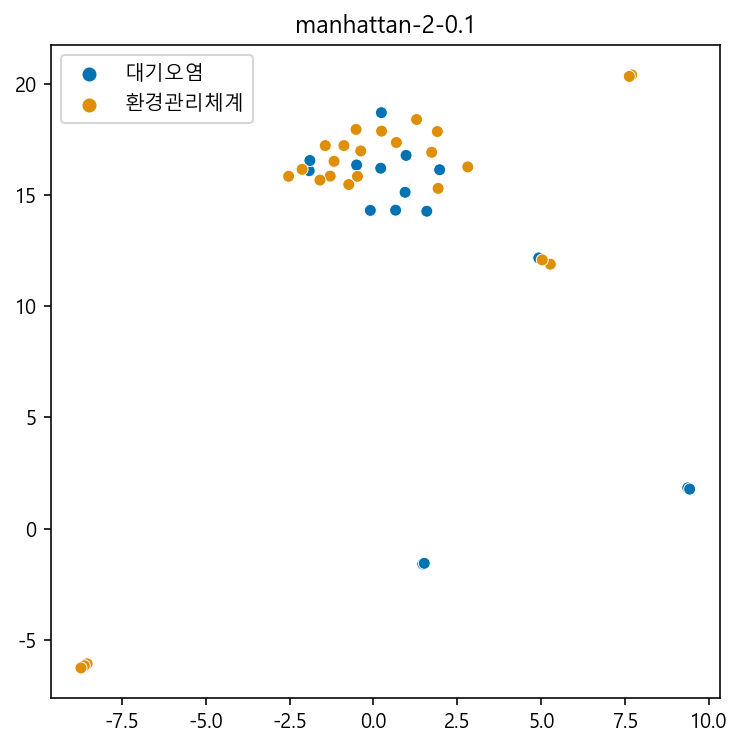

----------------------------------------------------------------------------------------------------
manhattan 2 0.4


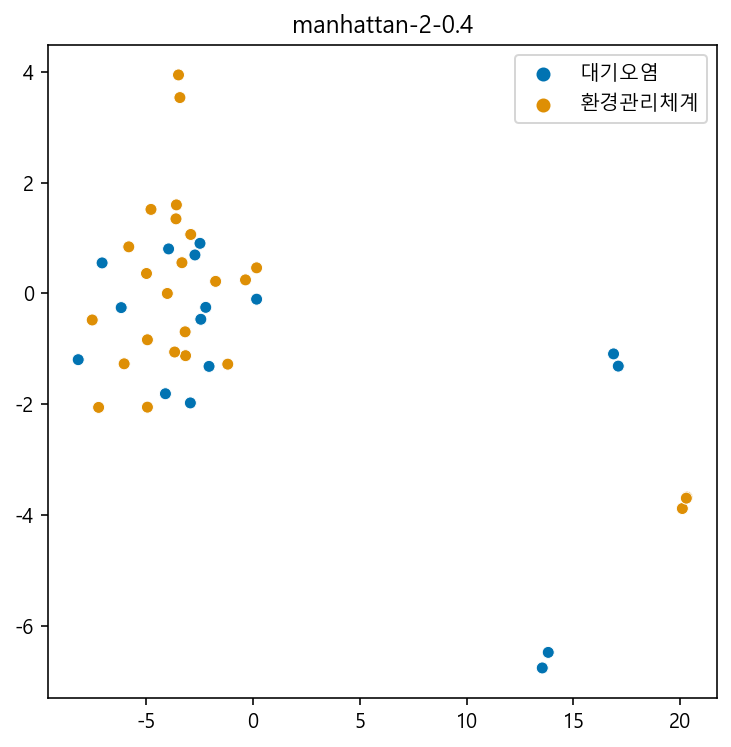

----------------------------------------------------------------------------------------------------
manhattan 2 0.7000000000000001


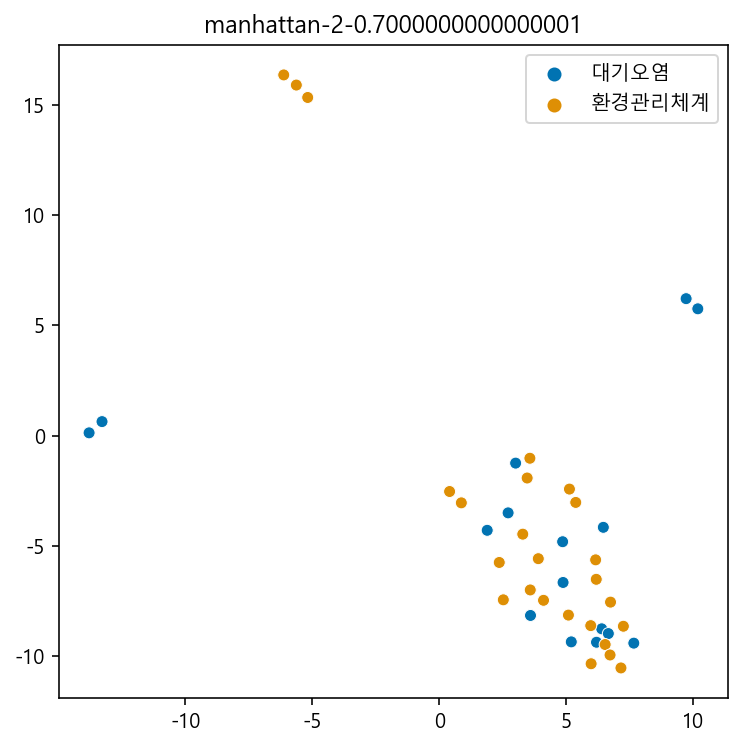

----------------------------------------------------------------------------------------------------
manhattan 3 0.1


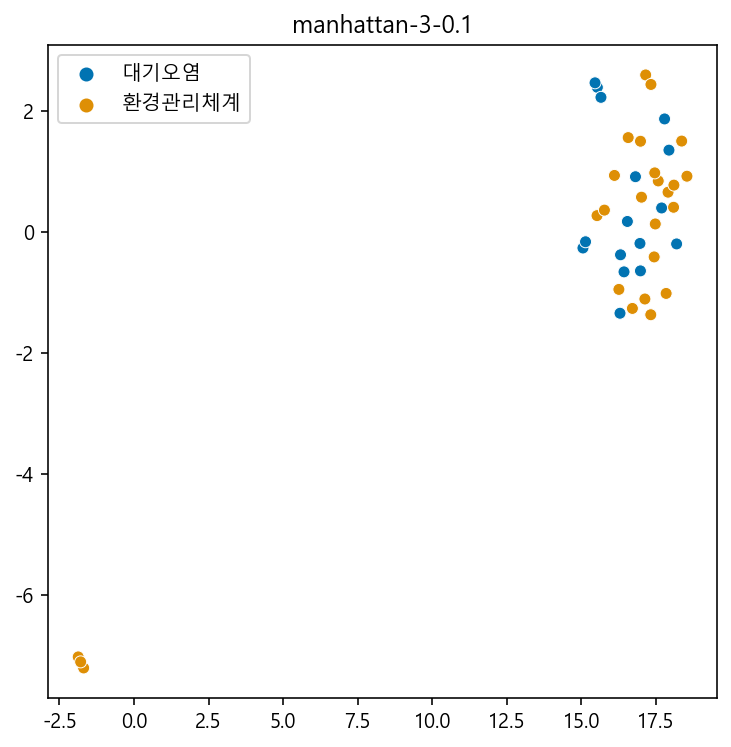

----------------------------------------------------------------------------------------------------
manhattan 3 0.4


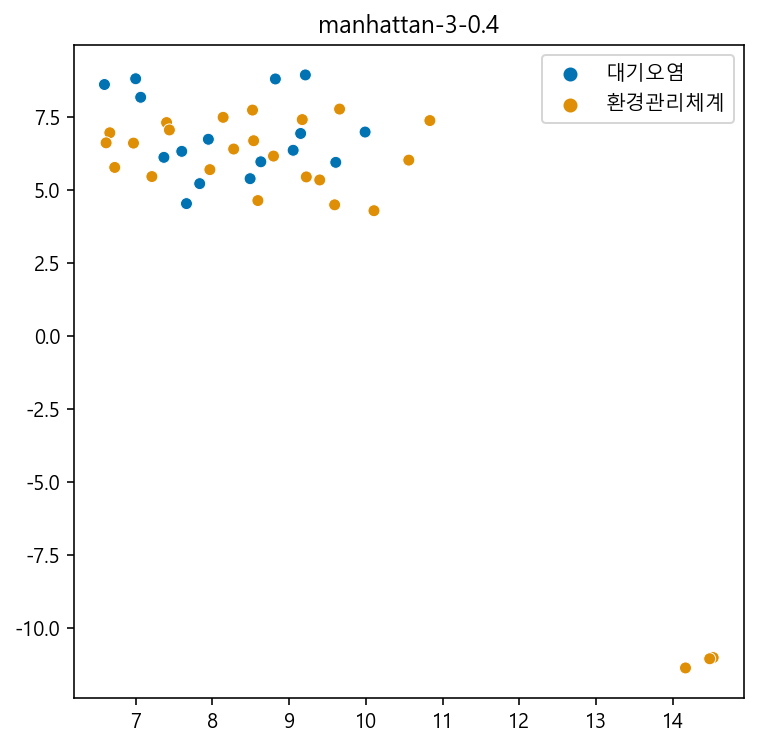

----------------------------------------------------------------------------------------------------
manhattan 3 0.7000000000000001


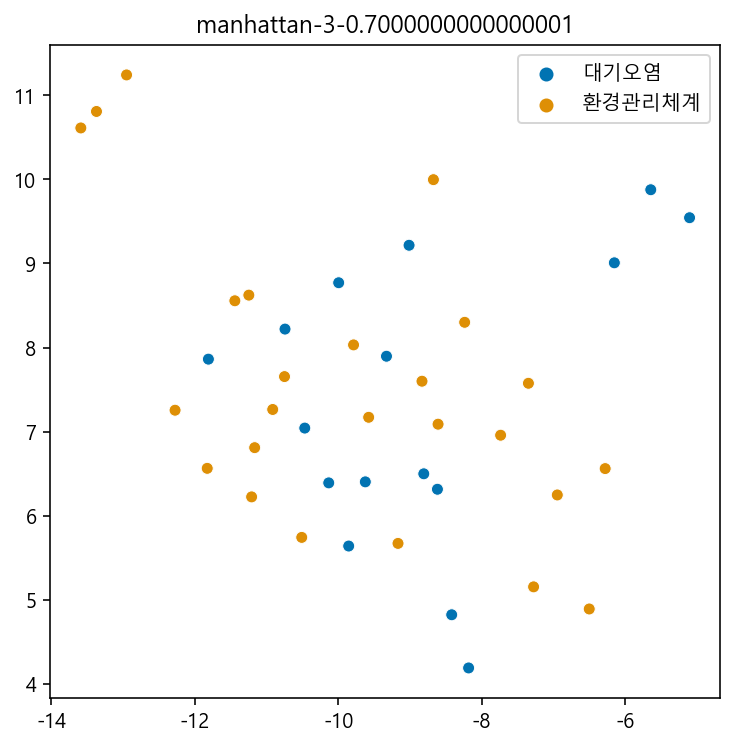

----------------------------------------------------------------------------------------------------
manhattan 4 0.1


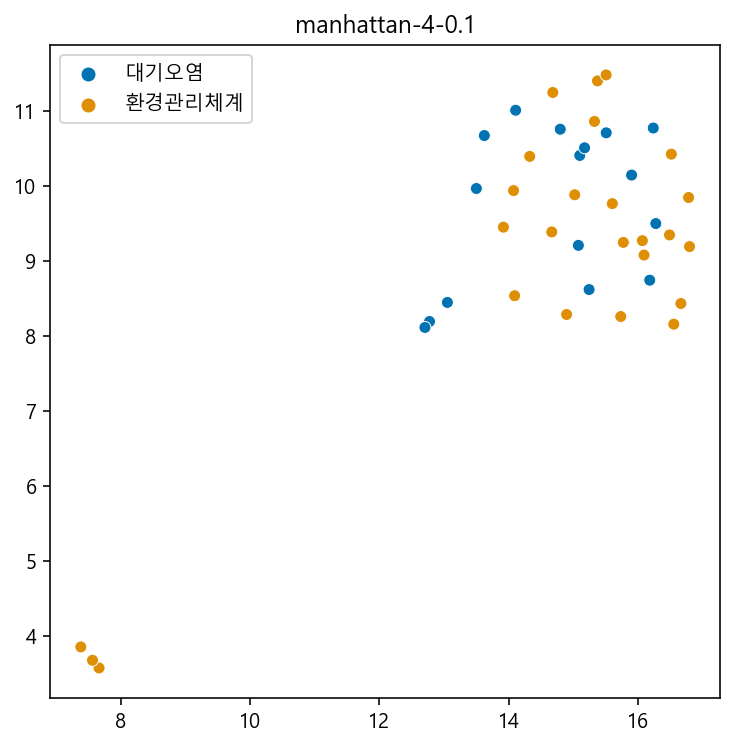

----------------------------------------------------------------------------------------------------
manhattan 4 0.4


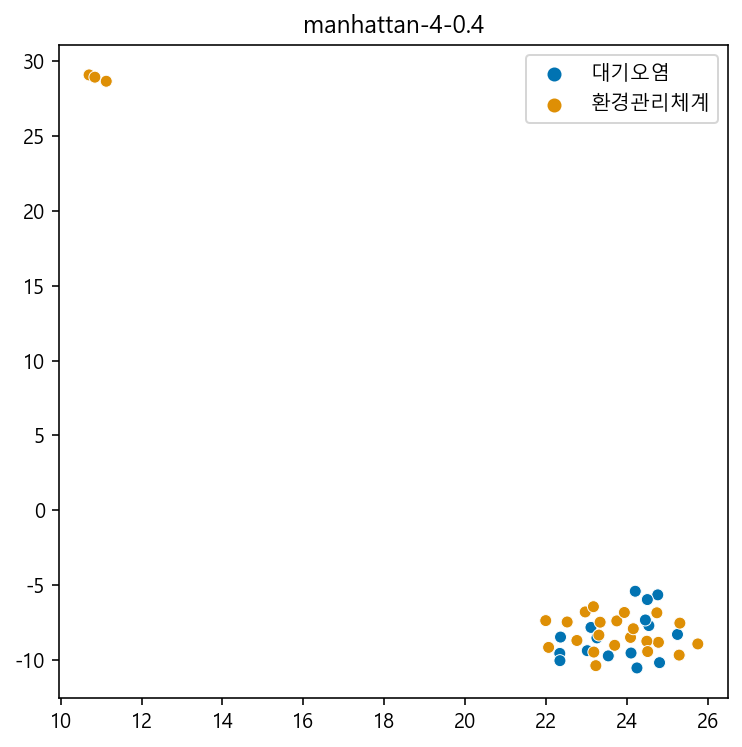

----------------------------------------------------------------------------------------------------
manhattan 4 0.7000000000000001


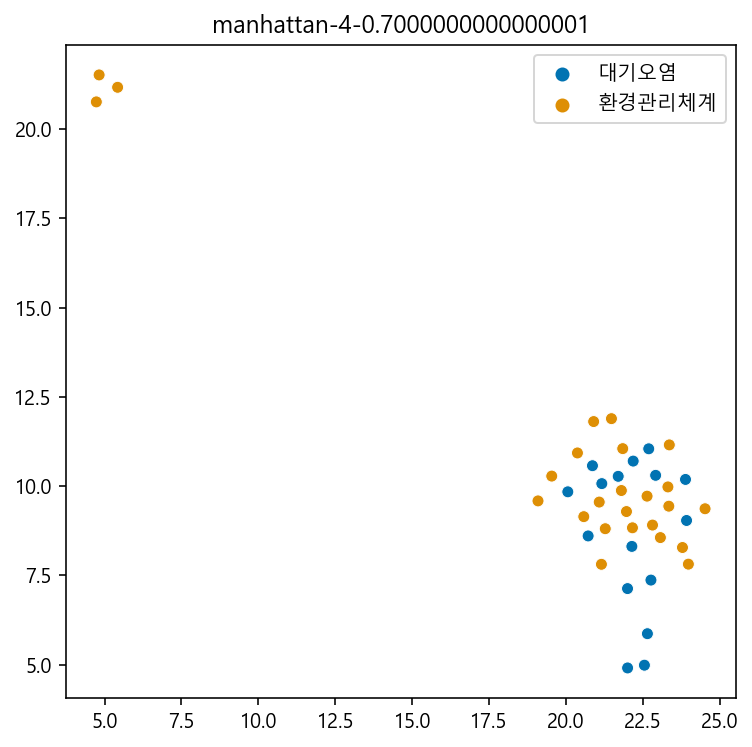

----------------------------------------------------------------------------------------------------
manhattan 5 0.1


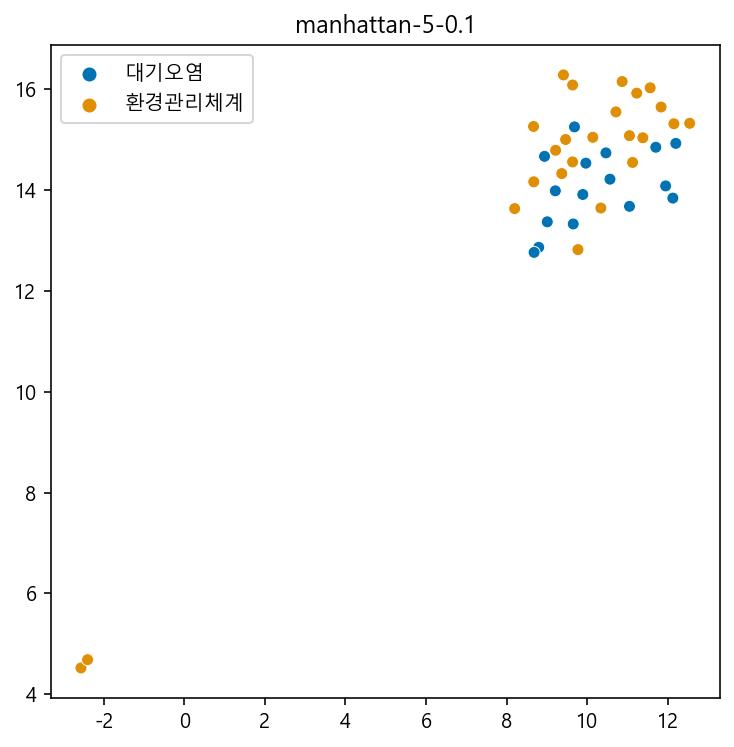

----------------------------------------------------------------------------------------------------
manhattan 5 0.4


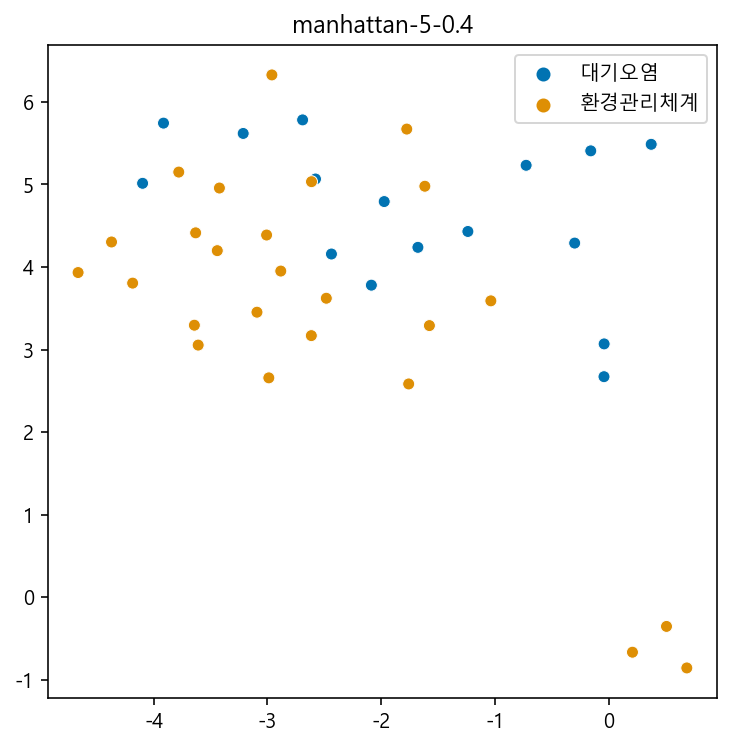

----------------------------------------------------------------------------------------------------
manhattan 5 0.7000000000000001


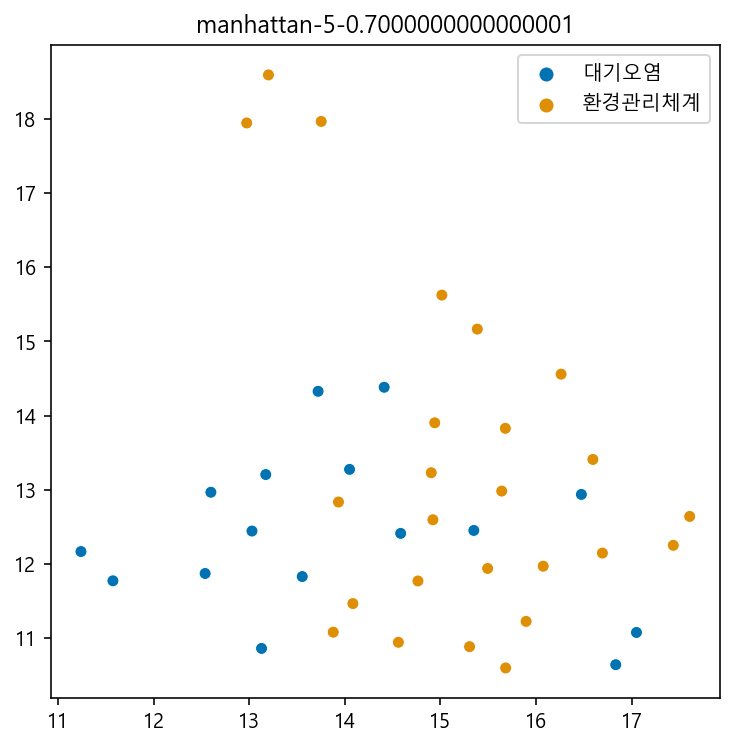

----------------------------------------------------------------------------------------------------
correlation 2 0.1


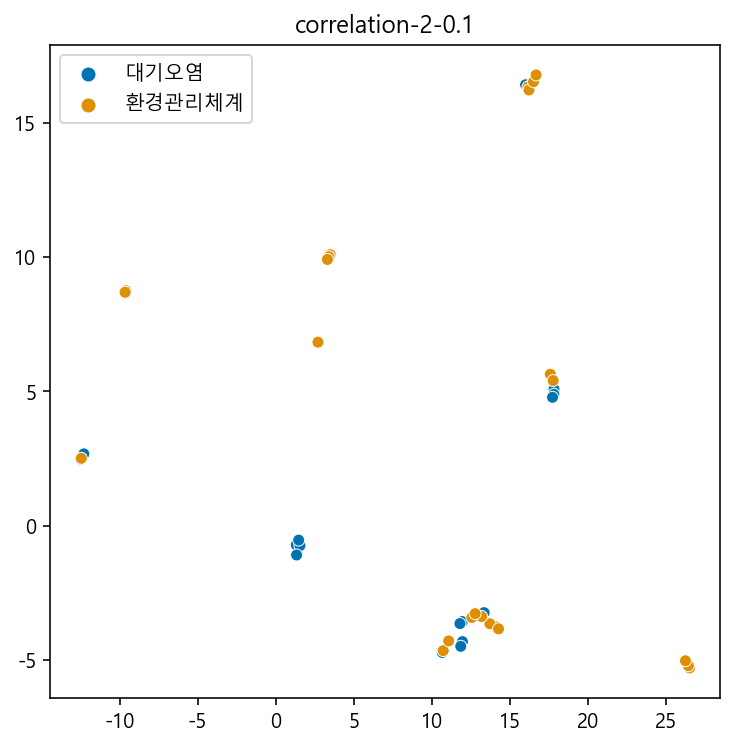

----------------------------------------------------------------------------------------------------
correlation 2 0.4


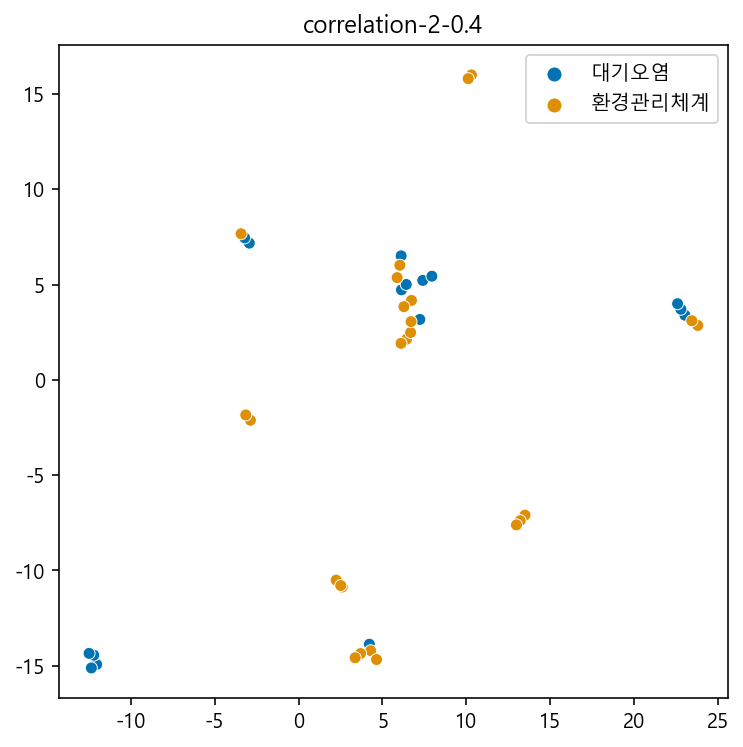

----------------------------------------------------------------------------------------------------
correlation 2 0.7000000000000001


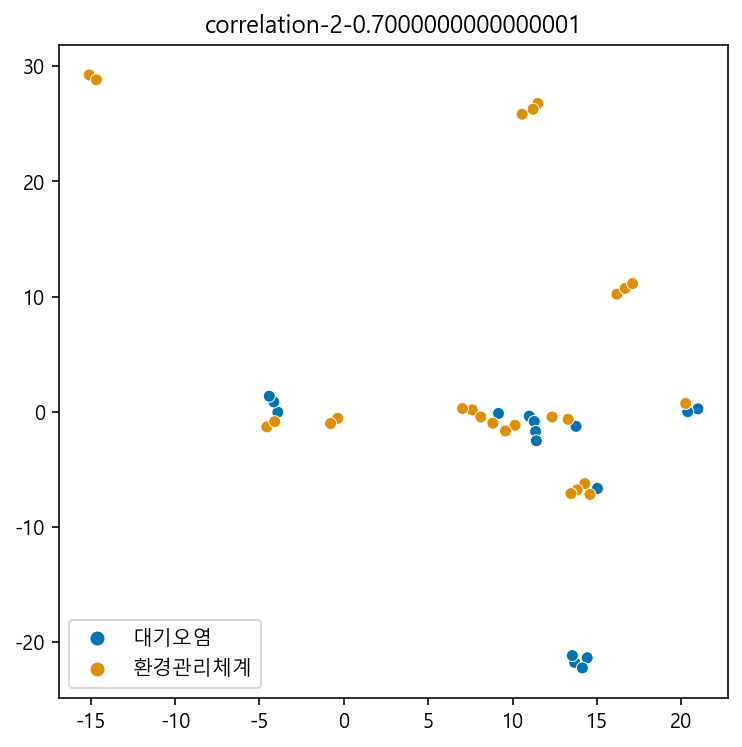

----------------------------------------------------------------------------------------------------
correlation 3 0.1


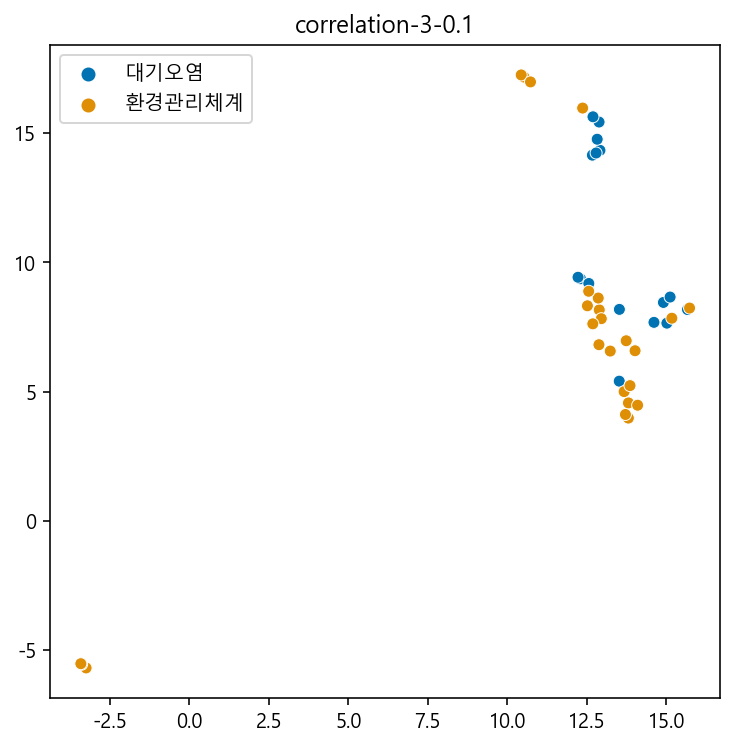

----------------------------------------------------------------------------------------------------
correlation 3 0.4


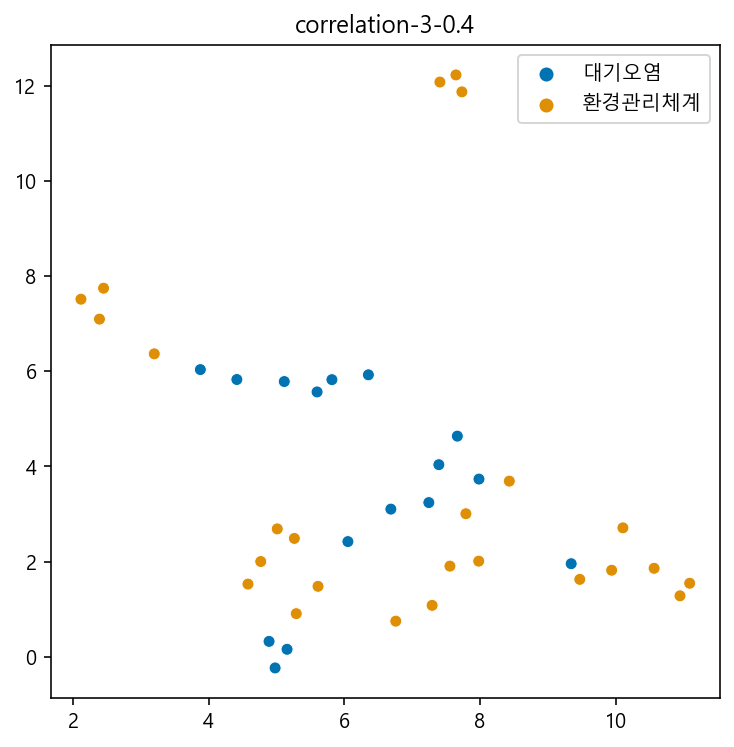

----------------------------------------------------------------------------------------------------
correlation 3 0.7000000000000001


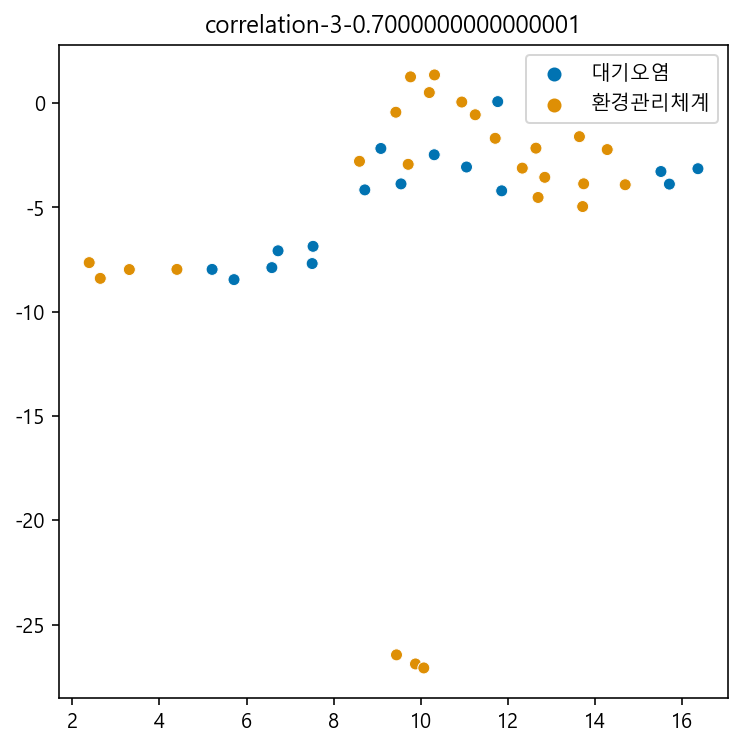

----------------------------------------------------------------------------------------------------
correlation 4 0.1


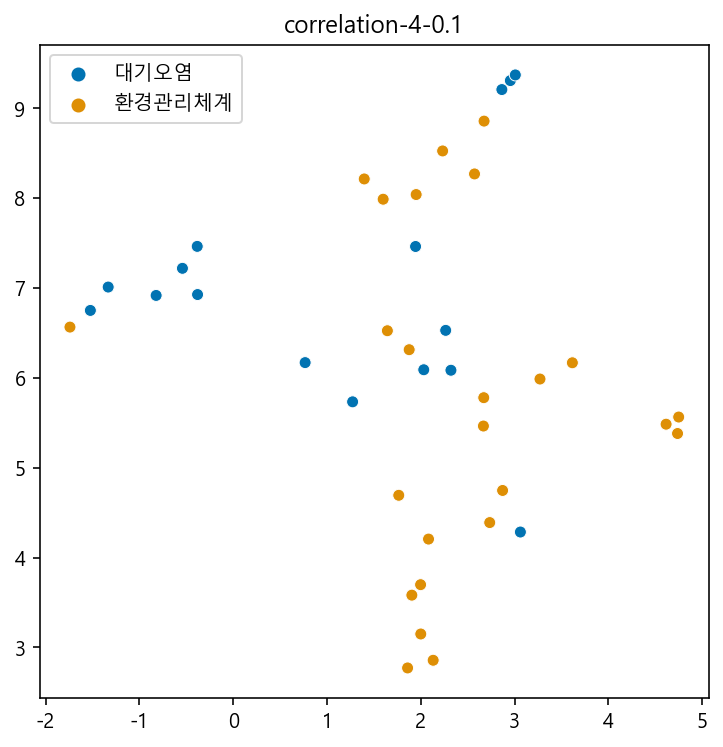

----------------------------------------------------------------------------------------------------
correlation 4 0.4


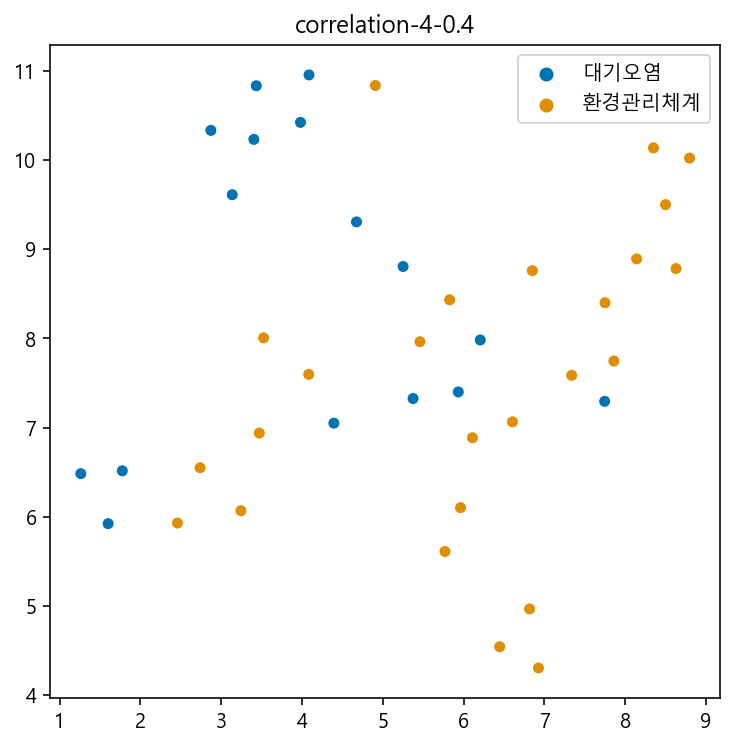

----------------------------------------------------------------------------------------------------
correlation 4 0.7000000000000001


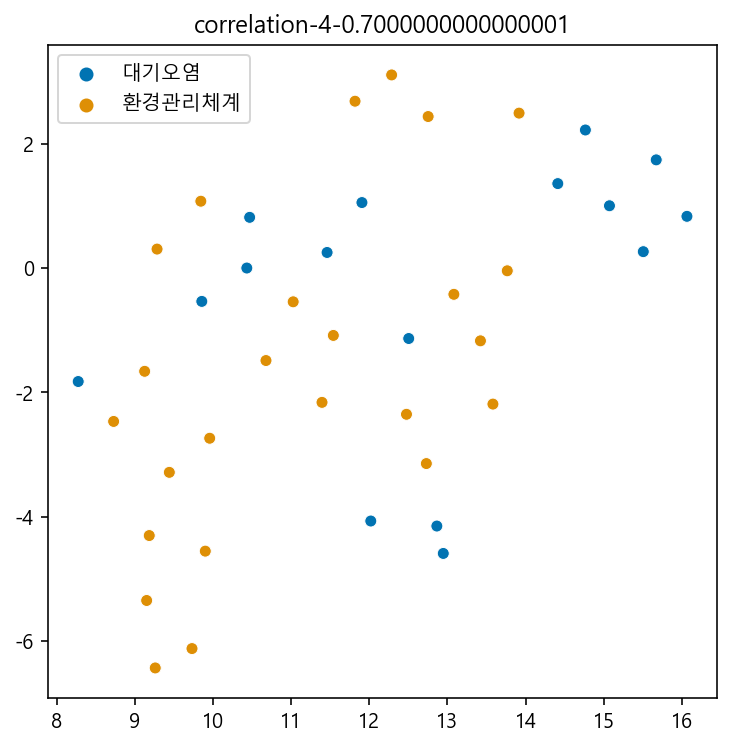

----------------------------------------------------------------------------------------------------
correlation 5 0.1


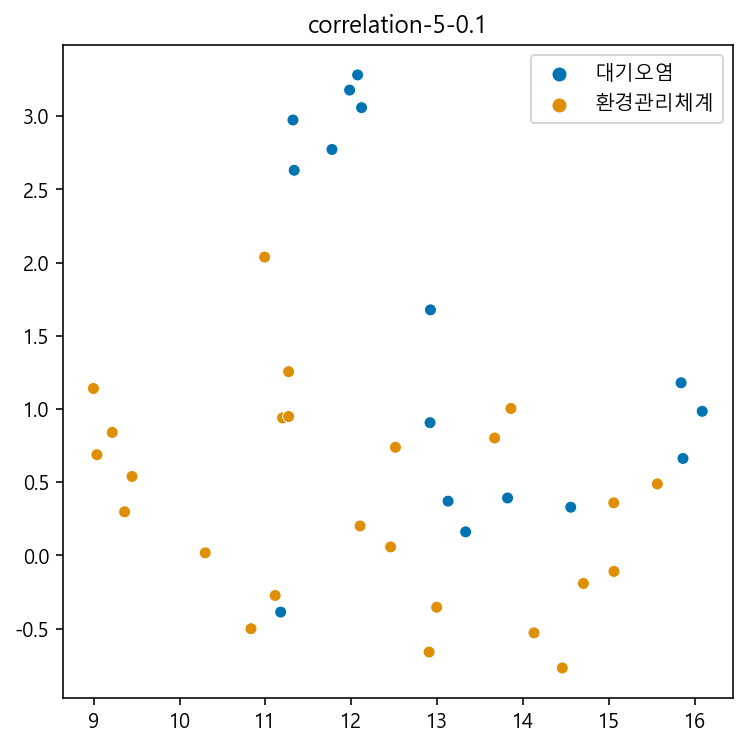

----------------------------------------------------------------------------------------------------
correlation 5 0.4


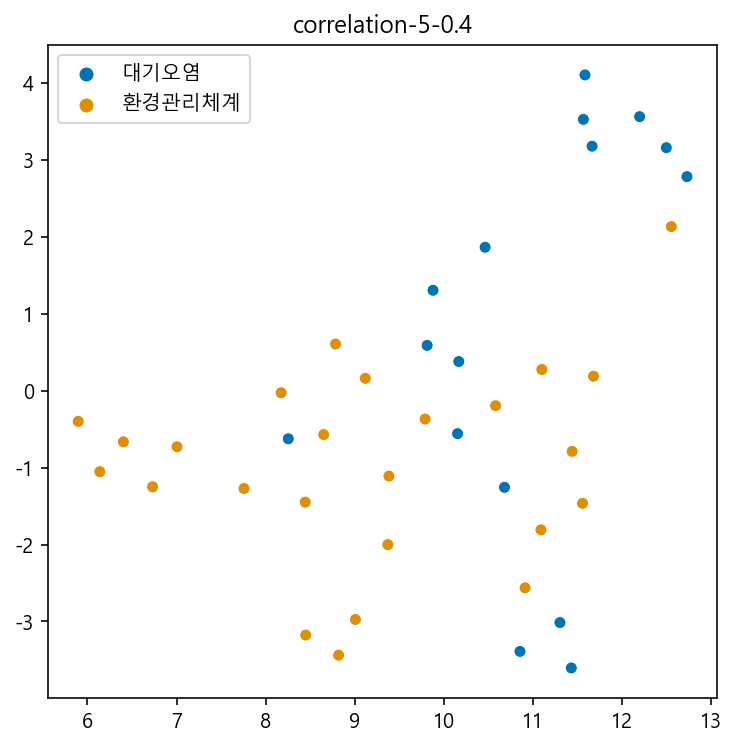

----------------------------------------------------------------------------------------------------
correlation 5 0.7000000000000001


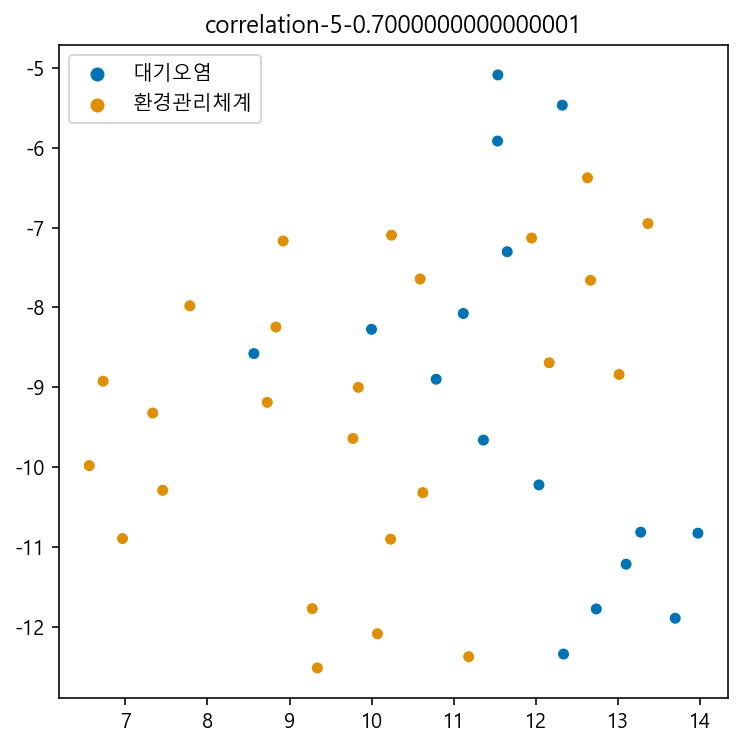

----------------------------------------------------------------------------------------------------
cosine 2 0.1


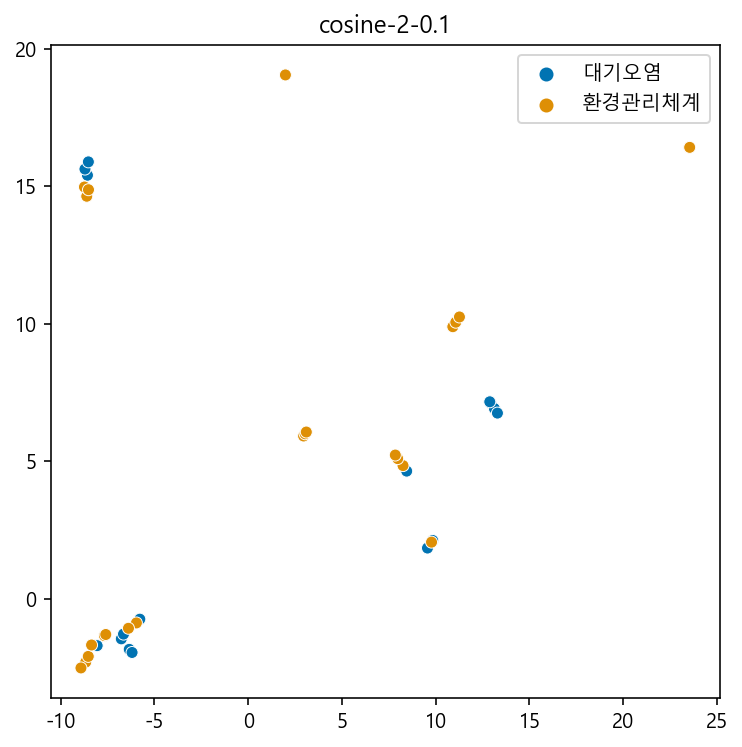

----------------------------------------------------------------------------------------------------
cosine 2 0.4


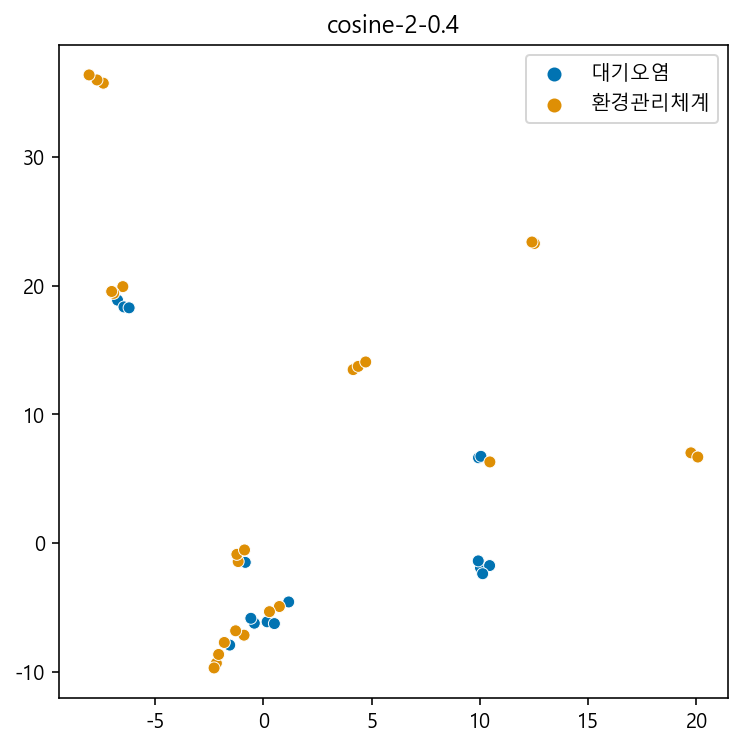

----------------------------------------------------------------------------------------------------
cosine 2 0.7000000000000001


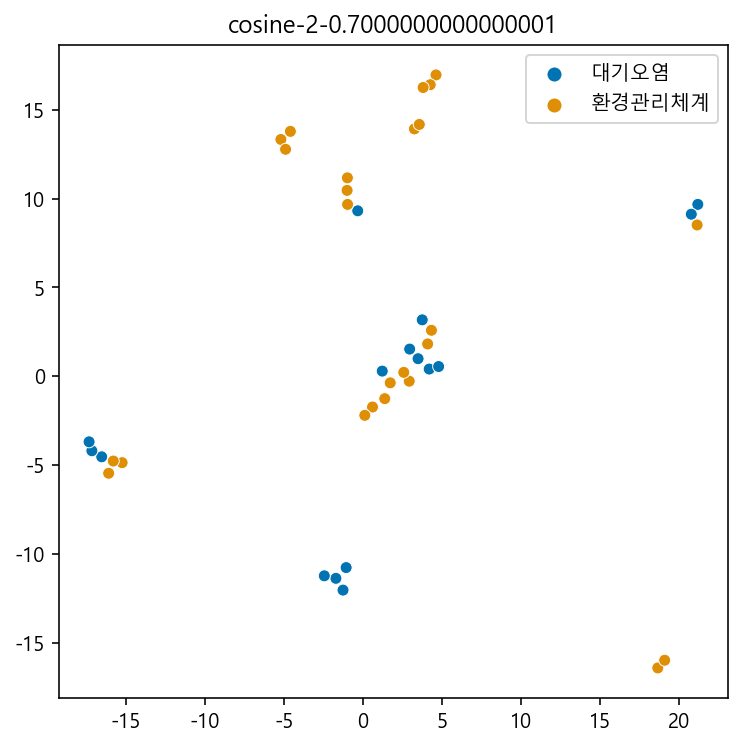

----------------------------------------------------------------------------------------------------
cosine 3 0.1


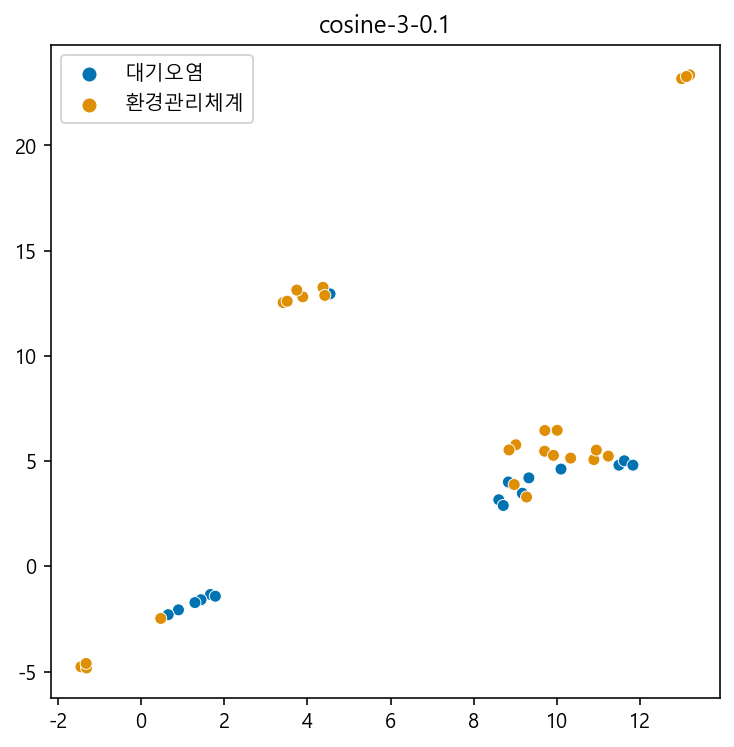

----------------------------------------------------------------------------------------------------
cosine 3 0.4


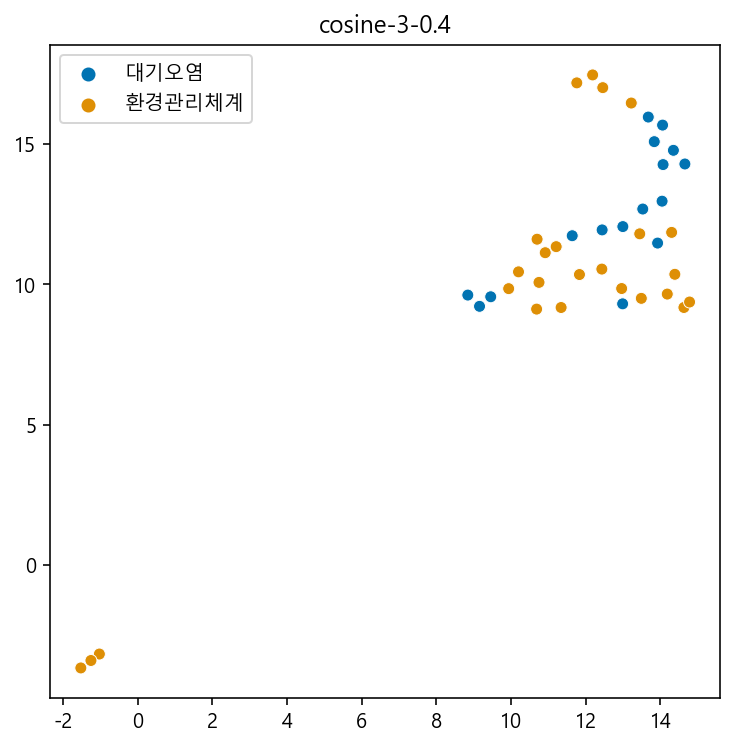

----------------------------------------------------------------------------------------------------
cosine 3 0.7000000000000001


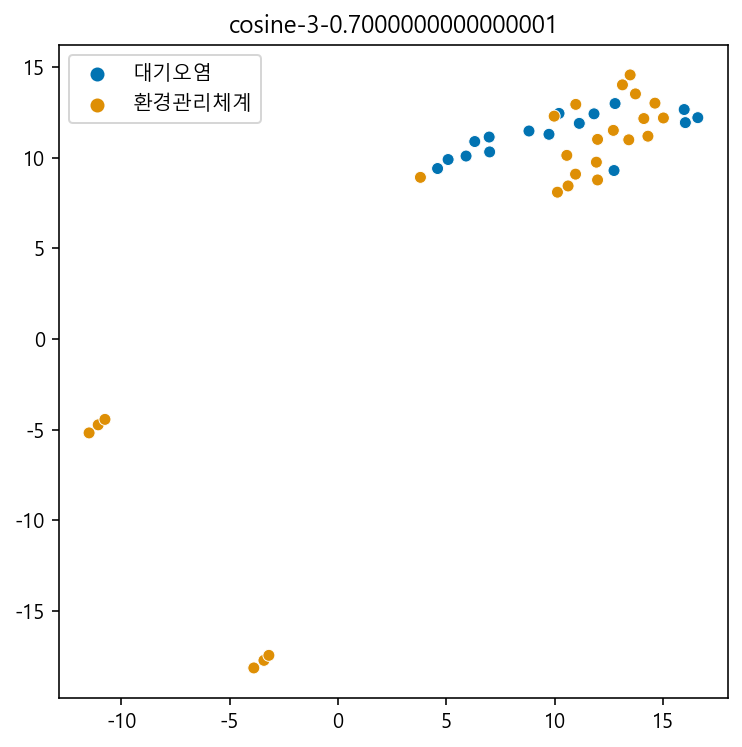

----------------------------------------------------------------------------------------------------
cosine 4 0.1


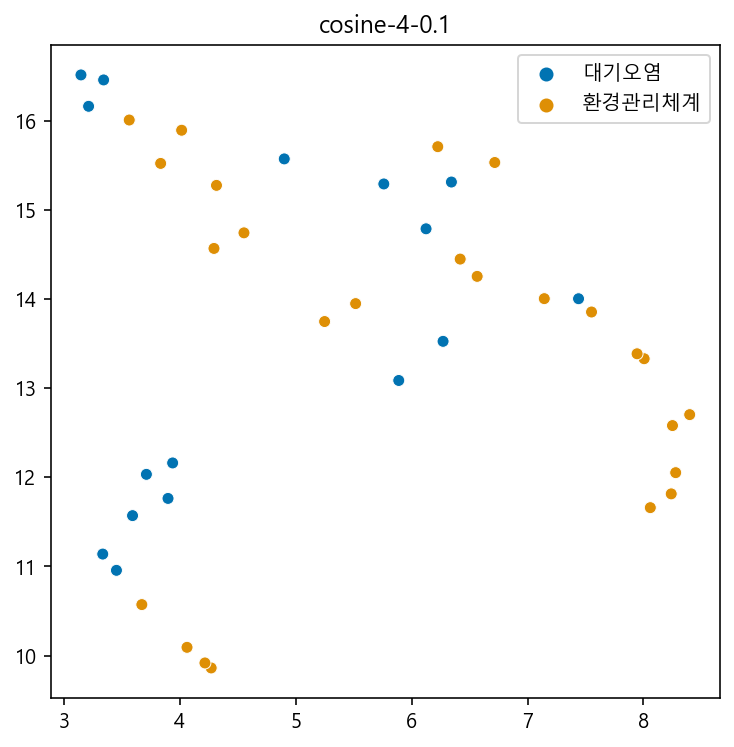

----------------------------------------------------------------------------------------------------
cosine 4 0.4


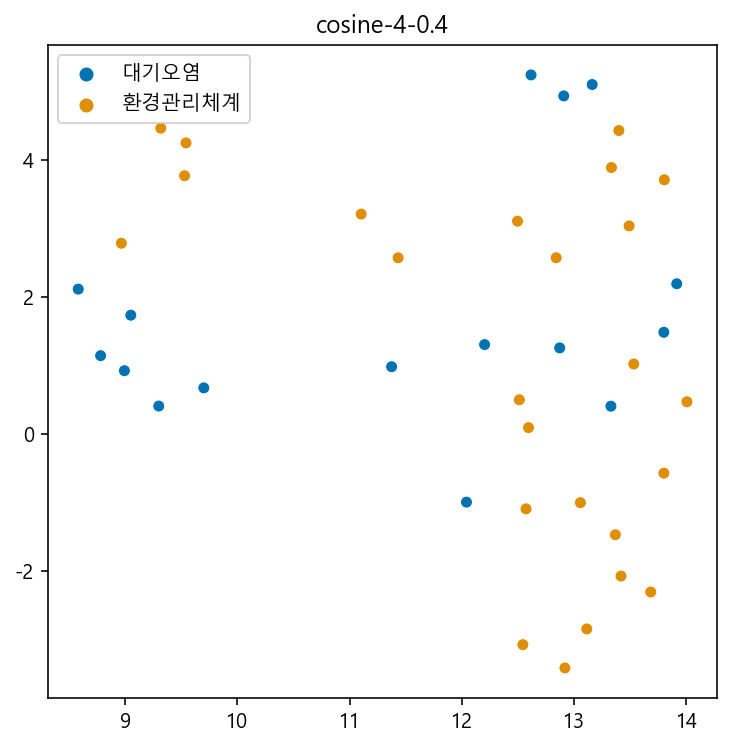

----------------------------------------------------------------------------------------------------
cosine 4 0.7000000000000001


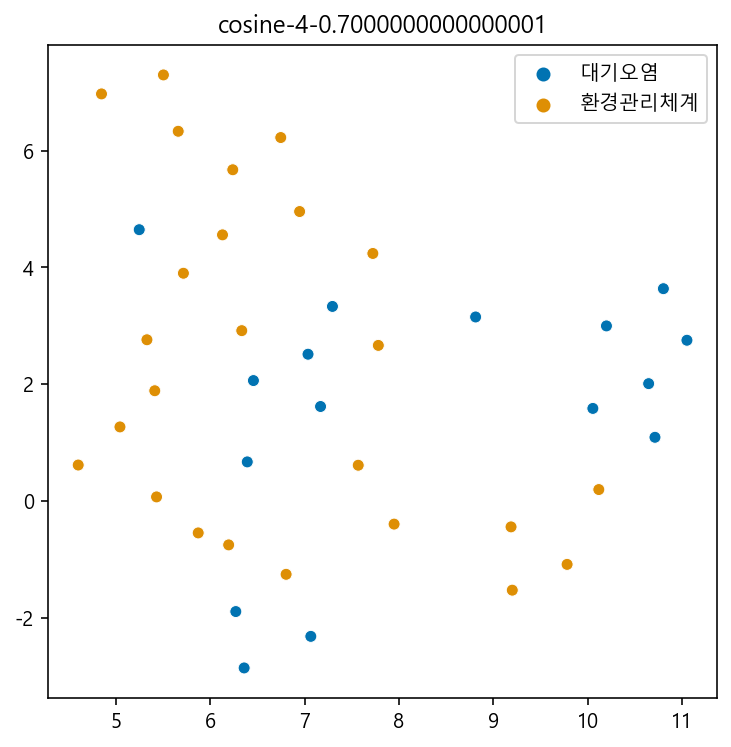

----------------------------------------------------------------------------------------------------
cosine 5 0.1


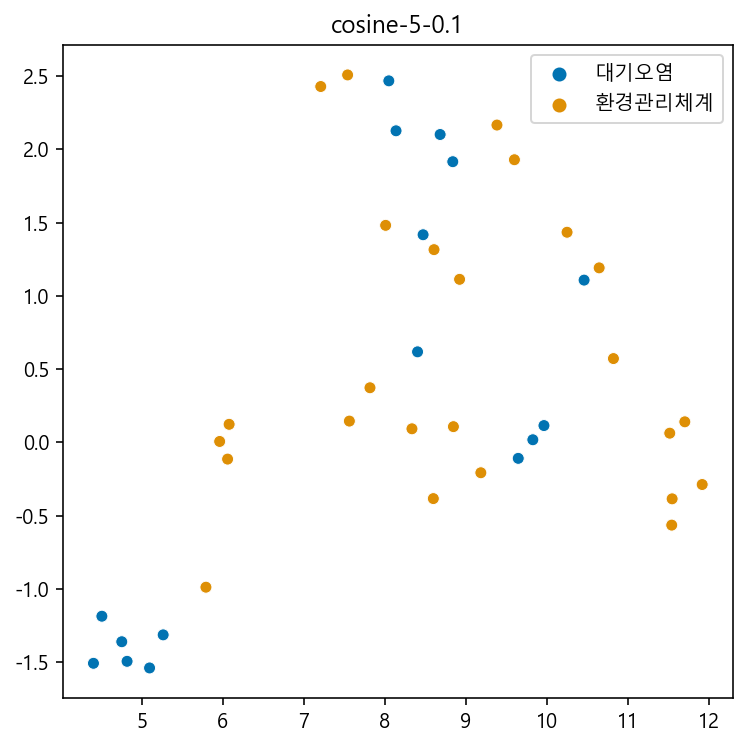

----------------------------------------------------------------------------------------------------
cosine 5 0.4


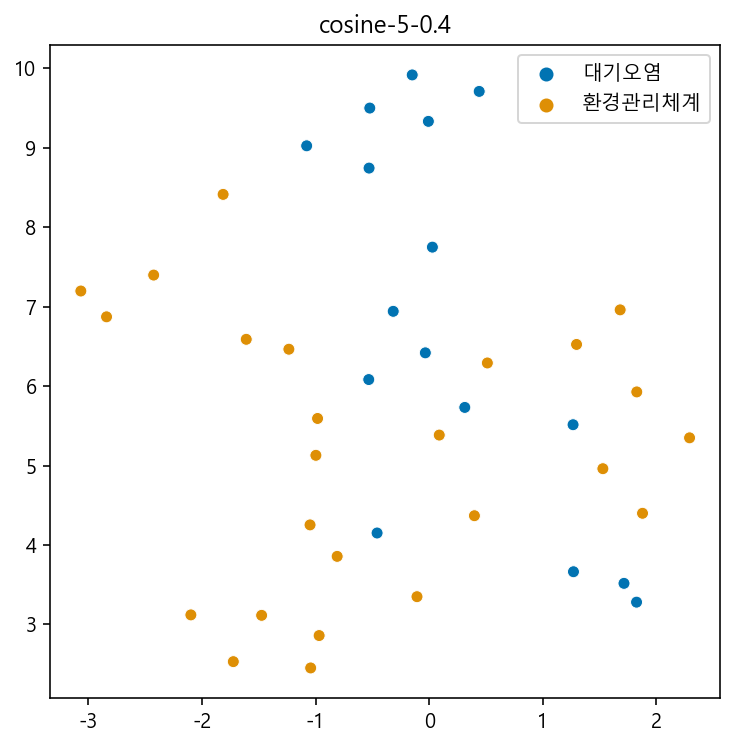

----------------------------------------------------------------------------------------------------
cosine 5 0.7000000000000001


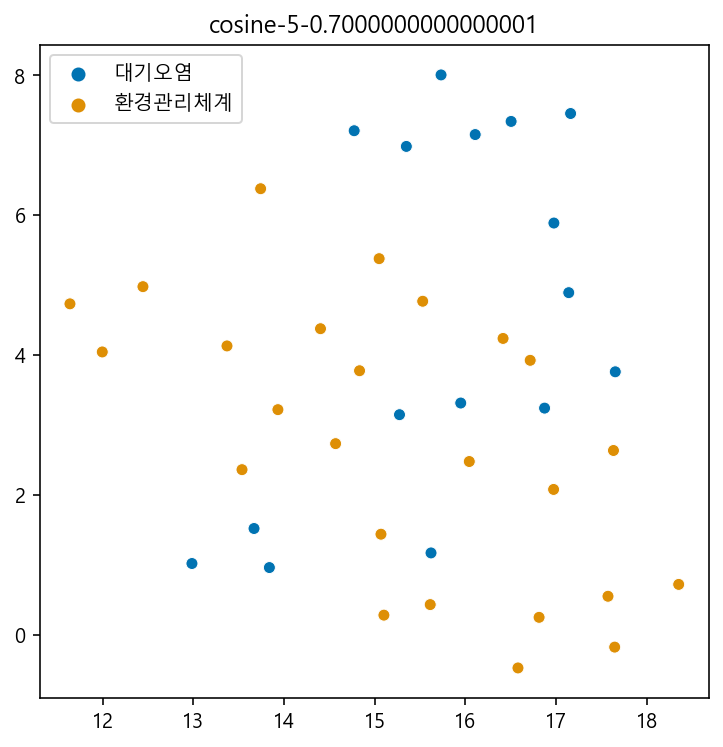

----------------------------------------------------------------------------------------------------
dice 2 0.1


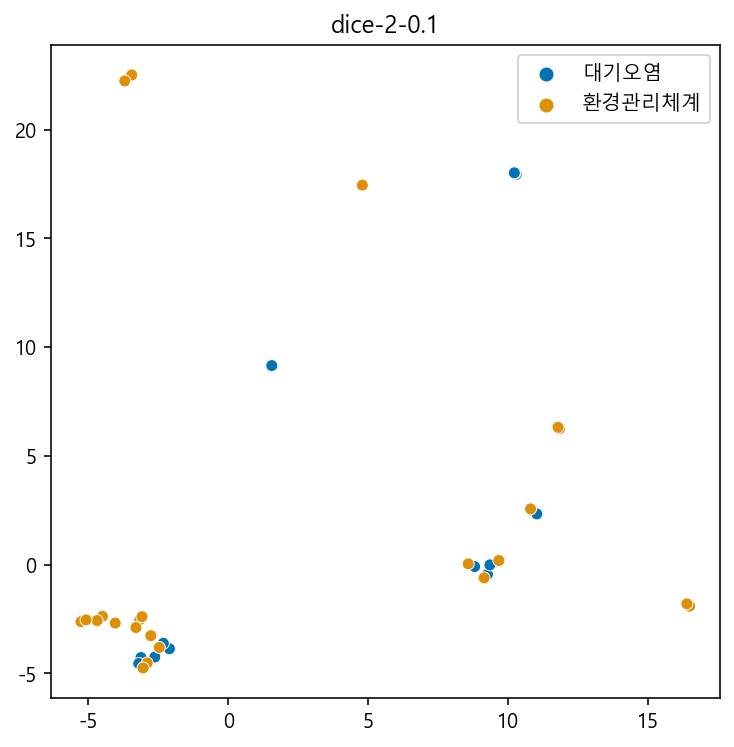

----------------------------------------------------------------------------------------------------
dice 2 0.4


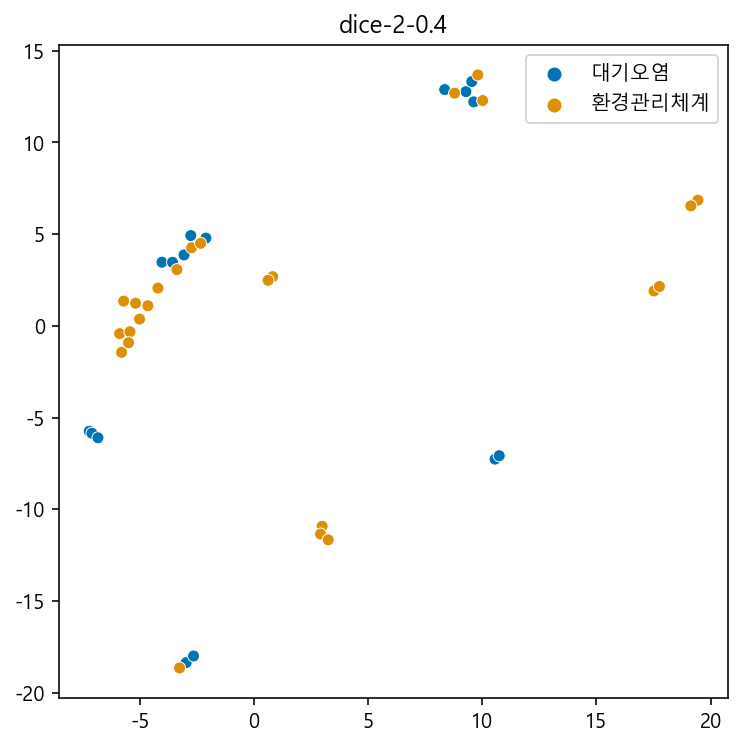

----------------------------------------------------------------------------------------------------
dice 2 0.7000000000000001


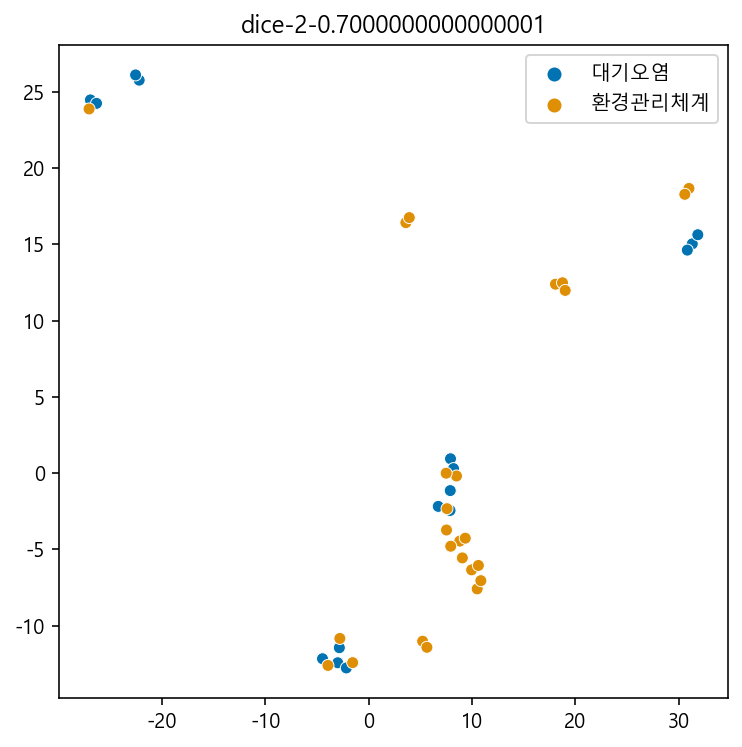

----------------------------------------------------------------------------------------------------
dice 3 0.1


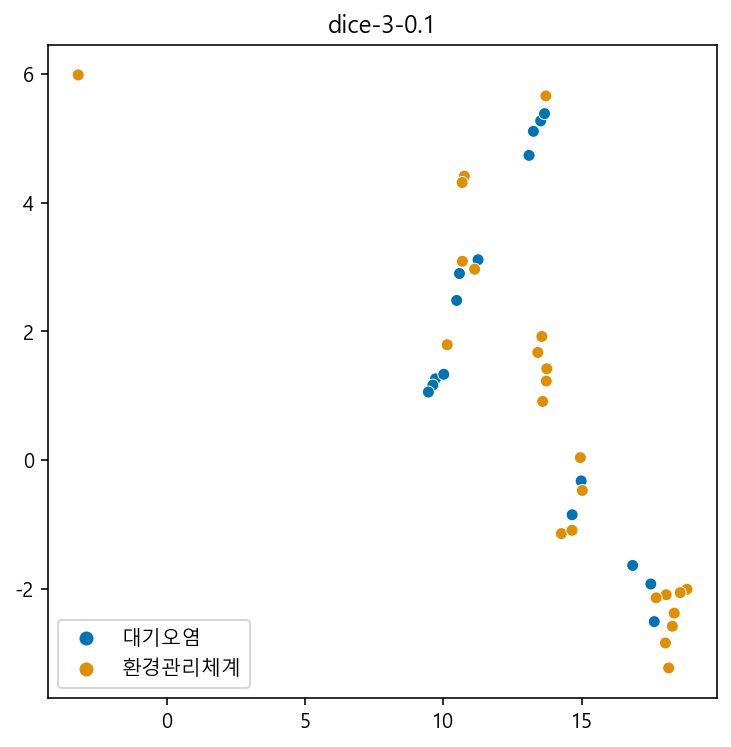

----------------------------------------------------------------------------------------------------
dice 3 0.4


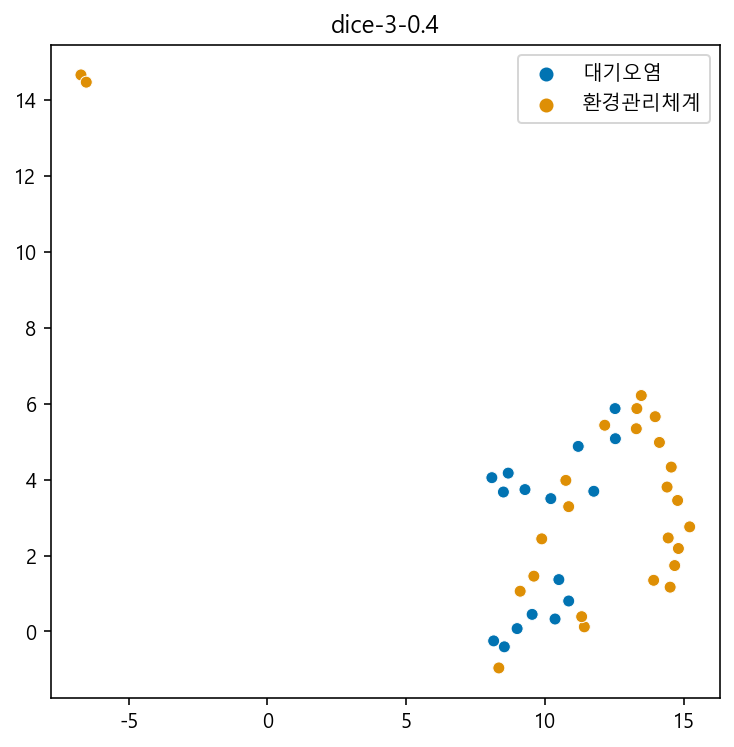

----------------------------------------------------------------------------------------------------
dice 3 0.7000000000000001


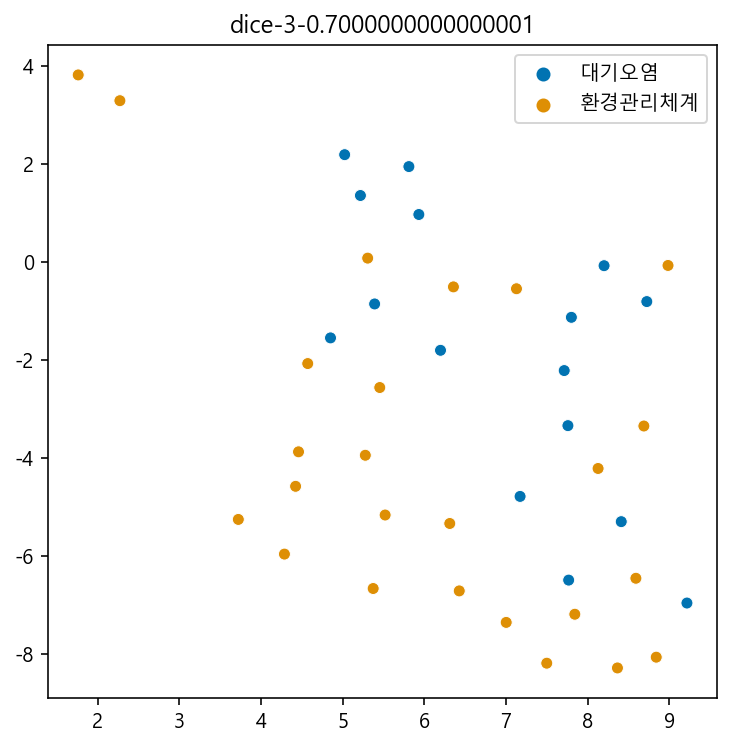

----------------------------------------------------------------------------------------------------
dice 4 0.1


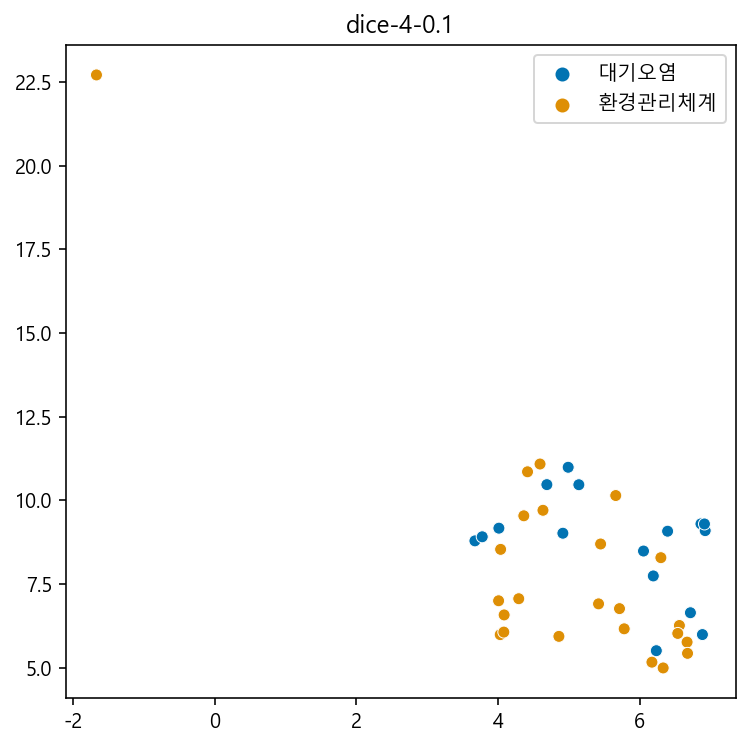

----------------------------------------------------------------------------------------------------
dice 4 0.4


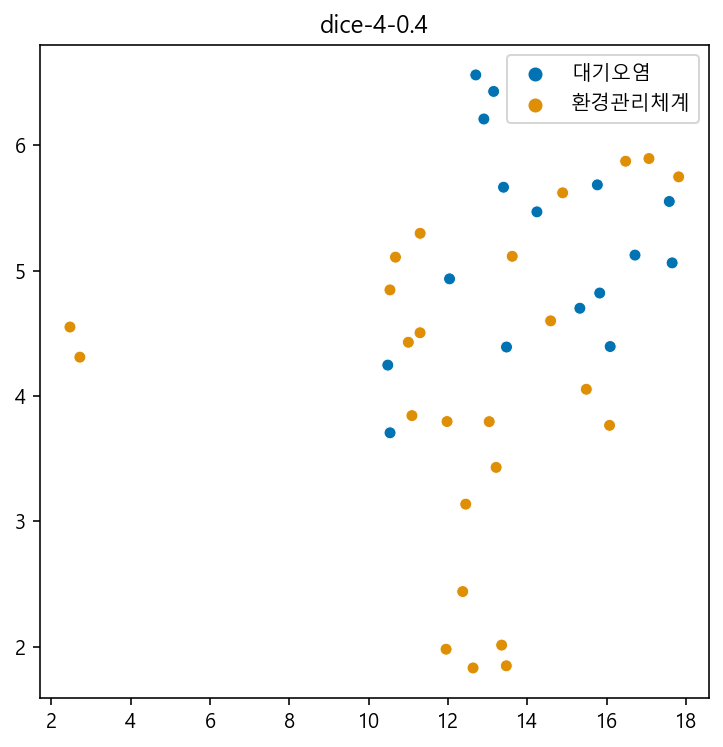

----------------------------------------------------------------------------------------------------
dice 4 0.7000000000000001


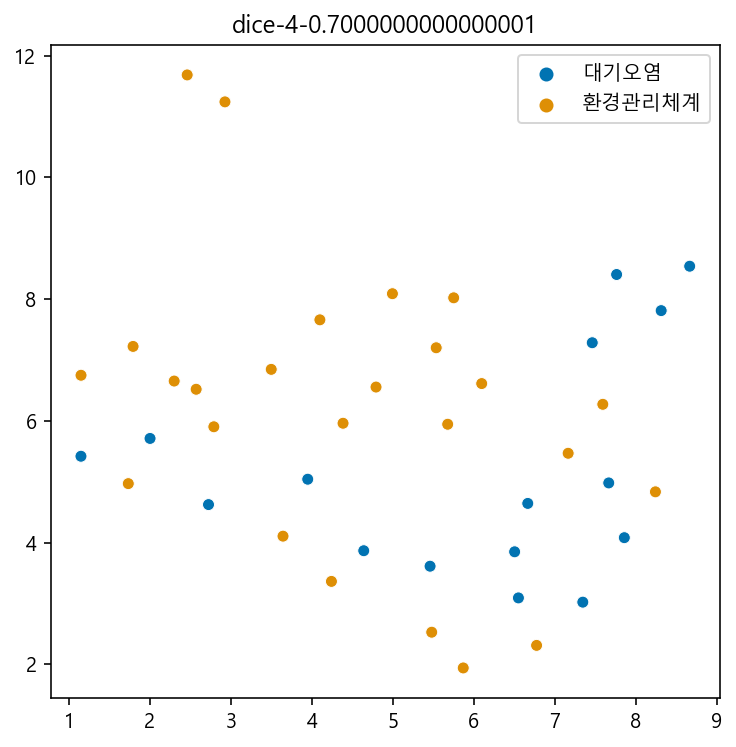

----------------------------------------------------------------------------------------------------
dice 5 0.1


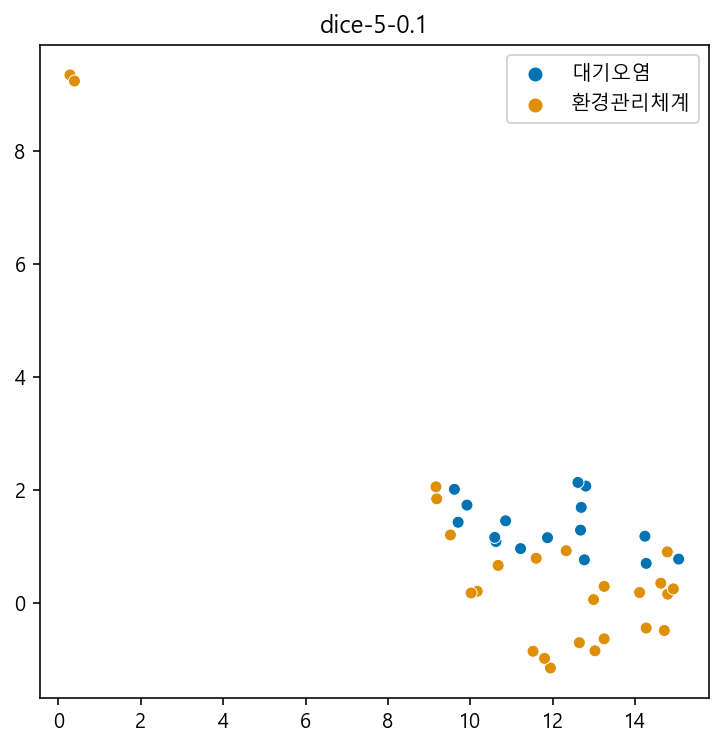

----------------------------------------------------------------------------------------------------
dice 5 0.4


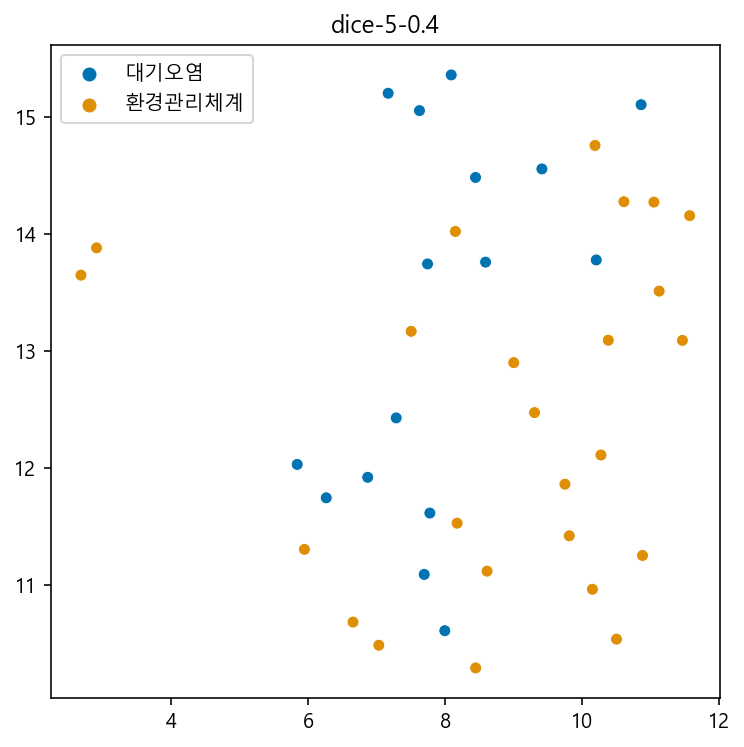

----------------------------------------------------------------------------------------------------
dice 5 0.7000000000000001


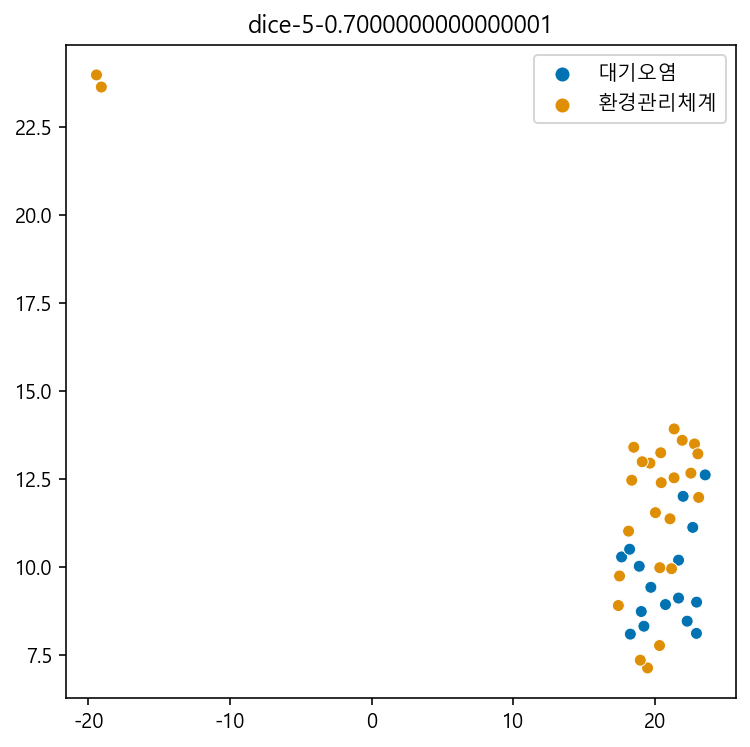

In [17]:
umap_combination_unsupervised(xs = feature, ys = df_all['from'].values, 
                              dist_list=dist_list, 
                              n_neighbor_list=n_neighbor_list, 
                              min_dist_list=min_dist_list,
                              issupervised = False , 
                              figsize = (6,6) , 
                              save_dir = './img')

https://d1wqtxts1xzle7.cloudfront.net/45055021/3116mlaij03.pdf?1461559087=&response-content-disposition=inline%3B+filename%3DA_SURVEY_ON_SIMILARITY_MEASURES_IN_TEXT.pdf&Expires=1673592310&Signature=TWtCItiqnq7se8rupDyMqSUzIDmg3MDgkp1RHysm1rbSeR5hO-IQCYWNJIIfcq4SYoyGu1HUI8S9EsXbs0R6MxKSiAz96q~xsixfQj3SnM-RtTQSSAxMgBIY3PnlTCwezgfJE62riiz-zGtdv3I7H1cWaDvq5jOmyUIPq9aFbaHcnngnnHLXkCP5WkU~DS28NUmQxbt8P6Fee79xjpi7vA0Qo-IAIzDndK8h2F9yfPjGCylVrfErQqXnmEFSomS0tXXsjUa77d2rMCVWRg6jZGAIKiozGK-i5fXG5fk8EJ2UvxRk8BoyswMY-Y7SJ-6THkraZRrWWzjkGRx1FDZ4yA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA